# Importing Required Modules

## General Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re
import html

## NLP

In [2]:
import textacy.preprocessing as tprep
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

# Functions

In [3]:
def rearrange_columns(df, dict = None):

    if dict is None:

        text = df["text"]
        sentiment = df["sentiment"]

    else:

        text = df[dict["text"]]
        sentiment = df[dict["sentiment"]]

    df = pd.concat([text, sentiment], axis=1)

    return df

In [4]:
def impurity_ratio(text, regex, min_len=10):
    """
    

    Parameters
    ----------
    text : str
        The text to be analysed.
    regex : regular expression.
        A regular expresion containing the characters considered impure.
    min_len : int, optional
        minimum length of the string to be analysed. The default is 10.

    Returns
    -------
    int
        Impurity ratio of the analysed text.

    """
    
    
    if len(text) < min_len:
        return 0
    else:
        return len(regex.findall(text))/len(text)

In [5]:
def clean_text(text):
    """
    

    Parameters
    ----------
    text : str
        Text that will be cleaned according to the rules explained in the comments.

    Returns
    -------
    str
        Returns the cleaned text.

    """
    
    # convert html escapes like &amp; to characters.
    text = html.unescape(text)

    # tags like <tab>
    text = re.sub(r'<[^<>]*>', ' ', text)

    # markdown URLs like [Some text](https://....)
    text = re.sub(r'\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)

    # text or code in brackets like [0]
    text = re.sub(r'\[[^\[\]]*\]', ' ', text)

    # standalone sequences of specials, matches &# but not #cool
    text = re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)

    # standalone sequences of hyphens like --- or ==
    text = re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)

    # sequences of white spaces
    text = re.sub(r'\s+', ' ', text)

    ###########
    # The ones between ########### were added after one cleaning process, consider removed them for other datasets

    # sequences of > at the begining or end of word

    text = re.sub(r'\s>+|^>+|<+\s|<+$', ' ', text)
    
    # sequences of # (more than 1) at the begining or end of word

    text = re.sub(r'\b#{2,}|#{2,}\b', ' ', text)

    # - at the end of beginning of word

    text = re.sub(r'\s-|-\s|-$', ' ', text)
    
    # sequences of # (one or more) at the begining of number between 0-20 as in #1

    text = re.sub(r'#(?=[0-9])', ' ', text)

    ###########

    return text.strip()

    

# Configuration

In [6]:
# Plotting theme
sns.set_theme(style="darkgrid")

# Cleaning and Normalising the Data - Pipeline

In [7]:
path = "Data/financial/fin_red_data.csv"
df = pd.read_csv(path)
df = rearrange_columns(df)

In [8]:
df["text"] = (df["text"].apply(clean_text)       # cleans the text, see function in functions section
                        .apply(tprep.normalize.hyphenated_words)   # normalizes hyphendation
                        .apply(tprep.normalize.quotation_marks)    # normalizes fancy quotation marks to ASCII
                        .apply(tprep.normalize.unicode)            # normalizes unicode to ASCII
                        .apply(tprep.remove.accents)               # normalizes accents
                        .apply(tprep.replace.urls)                 # replaces urls by __URL__
                        .apply(tprep.replace.emails)               # replaces emails by __EMAIL__
                        .apply(tprep.replace.emojis)               # replaces emails by __EMOJI__
                    )

In [9]:
df.to_csv("Data/financial/fin_red_data_cleaned.csv", index=False)

# Loading the Data

In [10]:
path = "Data/financial/fin_red_data.csv"
df = pd.read_csv(path)
df = rearrange_columns(df)

# Data Exploration

## Basic Exploration

In [11]:
df.head()

,text,sentiment
0,European traffic grew nearly 30 % .,positive
1,Singapore in May 2011 1 July 2010 - Finnish ai...,positive
2,"Ragutis , controlled by the Finnish brewery Ol...",positive
3,Outotec 's net profit for the second quarter o...,positive
4,"In addition , the production at the Varpaisj+_...",negative


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1198 entries, 0 to 1197
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1198 non-null   object
 1   sentiment  1198 non-null   object
dtypes: object(2)
memory usage: 18.8+ KB


To simplify for the rest of the notebook calling the text and the sentiment columns we will create dedicated variables.

In [13]:
text_untouched_df = df["text"]
text_df = df["text"]
sentiment_df = df["sentiment"]

In [14]:
sentiment_count = sentiment_df.value_counts(dropna=False)


Bar Plot of the sentiment binary distribution. The dataset is perfectly balance

<BarContainer object of 2 artists>

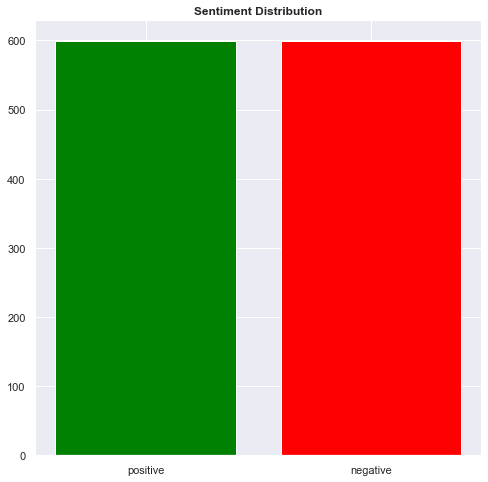

In [15]:
# create figure and axes
fig1, ax1 = plt.subplots(figsize = (8,8))

# set title
ax1.set_title('Sentiment Distribution', fontweight='bold')

# plot the bar chart
ax1.bar(sentiment_count.index, sentiment_count, color=('green','red'))

There are no missing values in the data and all are string.

In [16]:
text_n_nostr = text_df.shape[0] - sum([isinstance(i, str) for i in text_df])
sentiment_n_nostr = sentiment_df.shape[0] - sum([isinstance(i, str) for i in sentiment_df])

print(f"The number of values not string in column text is {text_n_nostr}.")
print(f"The number of missing values in sentiment column is {sentiment_n_nostr}.")

The number of values not string in column text is 0.
The number of missing values in sentiment column is 0.


## Exploring the length of the texts

Let us create a new column with the lenght of the text text.

In [17]:
df.insert(1, column="text_length", value=[len(text) for text in text_df])

In [18]:
df.head(10)

,text,text_length,sentiment
0,European traffic grew nearly 30 % .,35,positive
1,Singapore in May 2011 1 July 2010 - Finnish ai...,190,positive
2,"Ragutis , controlled by the Finnish brewery Ol...",155,positive
3,Outotec 's net profit for the second quarter o...,136,positive
4,"In addition , the production at the Varpaisj+_...",107,negative
5,"In the third quarter , net sales increased by ...",128,positive
6,"Nokia , which has a strong track record in the...",212,positive
7,Lassila & Tikanoja 's operating profit excludi...,154,negative
8,"Paper companies were in negative territories ,...",178,negative
9,"( ADP News ) - Jan 22 , 2009 - Finnish mobile ...",197,negative


In [19]:
df["text"][9]

'( ADP News ) - Jan 22 , 2009 - Finnish mobile phones maker Nokia Oyj ( OMX : NOK1V ) said today its operating profit decreased to EUR 5 billion ( USD 6.5 bn ) for 2008 from EUR 8 billion for 2007 .'

In [20]:
df.describe()

,text_length
count,1198.000000
mean,130.619366
std,54.939615
min,24.000000
25%,87.000000
50%,121.000000
75%,165.000000
max,297.000000


C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'text Text Length Distribution'}, xlabel='text_length', ylabel='Density'>

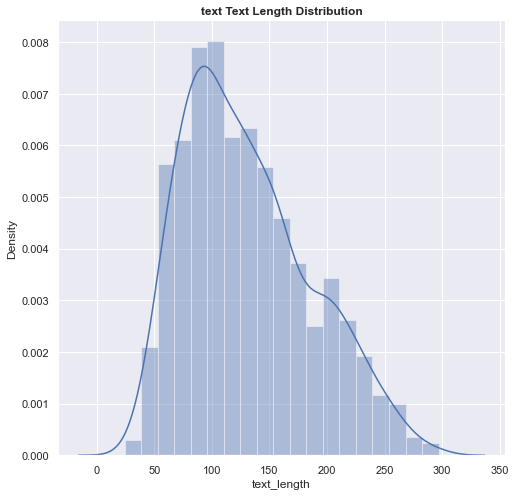

In [21]:
# create figure and axes
fig2, ax2 = plt.subplots(figsize = (8,8))

# set title
ax2.set_title('text Text Length Distribution', fontweight='bold')

# plot the bar chart
sns.distplot(df["text_length"])

C:\Users\user\miniconda3\envs\DA_ENV\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Boxplot - Length Distribution'}, xlabel='text_length'>

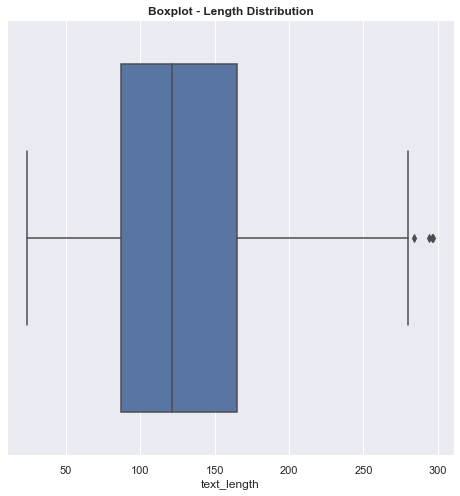

In [22]:
# create figure and axes
fig3, ax3 = plt.subplots(figsize = (8,8))

# set title
ax3.set_title('Boxplot - Length Distribution', fontweight='bold')

# plot the bar chart
sns.boxplot(df["text_length"])

## Exploring the level of impurity in the text

In [23]:
# characters considerd impure

RE_impure = re.compile(r'[#<>{}\[\]\\]')

In [24]:
# create a new columns with the text impurity

df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in text_df])

In [25]:
df.describe()

,text_length,impurity
count,1198.000000,1198.0
mean,130.619366,0.0
std,54.939615,0.0
min,24.000000,0.0
25%,87.000000,0.0
50%,121.000000,0.0
75%,165.000000,0.0
max,297.000000,0.0


In [26]:
# get the top 10 records in terms of impurity
impurity_sorted = df[["text", 'impurity']].sort_values(by='impurity', ascending=False).head(10)
impurity_sorted

,text,impurity
0,European traffic grew nearly 30 % .,0.0
804,The court found TelecomInvest 's arguments con...,0.0
802,Airvana 's UMTS Home Base Station femto cell u...,0.0
801,The company confirmed its estimate for lower r...,0.0
800,"Operating result showed a loss of EUR 2.9 mn ,...",0.0
799,- I am pleased that Bjorn Wahlroos has accepte...,0.0
798,"Net sales will , however , increase from 2005 .",0.0
797,"In sales volume , Coca-Cola 's market share ha...",0.0
796,"In Lithuania , operating profit rose to EUR 19...",0.0
795,Korhonen was dismissed from her post of editor...,0.0


In [27]:
impurity_sorted.iloc[0,0]

'European traffic grew nearly 30 % .'

In [28]:
impurity_sorted.iloc[1,0]

"The court found TelecomInvest 's arguments convincing ."

In [29]:
impurity_sorted.iloc[2,0]

"Airvana 's UMTS Home Base Station femto cell uses software-based functionality and off-the-shelf silicon to accelerate feature development and reduce product cost ."

# Cleaning and Normalising the Text Data

## Cleaning the text

In [30]:
df.insert(3, column="text_cleaned", value=[clean_text(text) for text in text_df])


In [31]:
# create a new columns with the cleaned text impurity
df.insert(4, column="cleaned_impurity", value=[impurity_ratio(text, RE_impure) for text in df["text_cleaned"]])

In [32]:
# get the top 10 records in terms of impurity
df[['text_cleaned', 'cleaned_impurity']].sort_values(by='cleaned_impurity', ascending=False).head(10)

,text_cleaned,cleaned_impurity
0,European traffic grew nearly 30 % .,0.0
804,The court found TelecomInvest 's arguments con...,0.0
802,Airvana 's UMTS Home Base Station femto cell u...,0.0
801,The company confirmed its estimate for lower r...,0.0
800,"Operating result showed a loss of EUR 2.9 mn ,...",0.0
799,I am pleased that Bjorn Wahlroos has accepted ...,0.0
798,"Net sales will , however , increase from 2005 .",0.0
797,"In sales volume , Coca-Cola 's market share ha...",0.0
796,"In Lithuania , operating profit rose to EUR 19...",0.0
795,Korhonen was dismissed from her post of editor...,0.0


In [33]:
df = (df.drop(["text", "impurity", "text_length"], axis=1)
           .rename({"text_cleaned": "text", "cleaned_impurity": "impurity"}, axis=1)
           )
text_df = df["text"]
sentiment_df = df["sentiment"]
df.insert(1, column="text_length", value=[len(text) for text in text_df])
df.head()

,text,text_length,impurity,sentiment
0,European traffic grew nearly 30 % .,35,0.0,positive
1,Singapore in May 2011 1 July 2010 Finnish air ...,186,0.0,positive
2,"Ragutis , controlled by the Finnish brewery Ol...",155,0.0,positive
3,Outotec 's net profit for the second quarter o...,136,0.0,positive
4,"In addition , the production at the Varpaisj+_...",107,0.0,negative


In [34]:
df.describe()

,text_length,impurity
count,1198.000000,1198.0
mean,130.206177,0.0
std,54.482897,0.0
min,24.000000,0.0
25%,87.000000,0.0
50%,121.000000,0.0
75%,165.000000,0.0
max,297.000000,0.0


## Character Normalization

### Hyphendation

In [35]:
df["text_norm"] = df["text"].apply(tprep.normalize.hyphenated_words) # normalize hyphendation
                       

Let us see the changes

In [36]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1198
Name: changed, dtype: int64

In [37]:
df["text"] = df["text_norm"]

### Fancy Quotation Marks

In [38]:
df["text_norm"] = df["text"].apply(tprep.normalize.quotation_marks) # normalize fancy quotation marks to ASCII

Let us see the changes

In [39]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1119
True       79
Name: changed, dtype: int64

In [40]:
changed = df[df["changed"]]
changed = changed.reset_index(drop=True)

In [41]:
changed["text"][0]

'`` The Government has had a very professional approach in assessing the offer .'

In [42]:
changed["text_norm"][0]

"'' The Government has had a very professional approach in assessing the offer ."

In [43]:
df["text"] = df["text_norm"]

### Unicode

In [44]:
df["text_norm"] = df["text"].apply(tprep.normalize.unicode) # normalize unicode to ASCII

Let us see the changes

In [45]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1198
Name: changed, dtype: int64

In [46]:
df["text"] = df["text_norm"]

### Removing the accents

In [47]:
df["text_norm"] = df["text"].apply(tprep.remove.accents) # remove accents as in ö

Let us see the changes

In [48]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1197
True        1
Name: changed, dtype: int64

In [49]:
changed = df[df["changed"]]
changed = changed.reset_index(drop=True)
changed

,text,text_length,impurity,sentiment,text_norm,changed
0,Net profit fell by almost half to +Ã¢ 5.5 mill...,91,0.0,negative,Net profit fell by almost half to +A¢ 5.5 mill...,True


In [50]:
changed["text"][0]

'Net profit fell by almost half to +Ã¢ 5.5 million from +Ã¢ 9.4 million at the end of 2007 .'

In [51]:
changed["text_norm"][0]

'Net profit fell by almost half to +A¢ 5.5 million from +A¢ 9.4 million at the end of 2007 .'

In [52]:
df["text"] = df["text_norm"]

### Masking URLs

In [53]:
df["text_norm"] = df["text"].apply(tprep.replace.urls)  # replace URLs by _URL_

Let us see the changes

In [54]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1198
Name: changed, dtype: int64

In [55]:
df["text"] = df["text_norm"]

### Masking Emojis

In [56]:
df["text_norm"] = df["text"].apply(tprep.replace.emojis)  # replace emojis by _EMOJI_

Let us see the changes

In [57]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1198
Name: changed, dtype: int64

In [58]:
df[df["changed"]]

,text,text_length,impurity,sentiment,text_norm,changed


In [59]:
df["text"] = df["text_norm"]

### Masking Emails

In [60]:
df["text_norm"] = df["text"].apply(tprep.replace.emails)  # replace emails by _EMAIL_

Let us see the changes

In [61]:
df["changed"] = [df["text"][i] != df["text_norm"][i] for i in range(df["text"].shape[0])] 
df["changed"].value_counts(dropna=False)

False    1198
Name: changed, dtype: int64

In [62]:
df[df["changed"]]

,text,text_length,impurity,sentiment,text_norm,changed


In [63]:
df["text"] = df["text_norm"]

## Creating and storing the cleaned dataset

In [64]:
df = df.drop(["impurity", "text_length", "text_norm", "changed"], axis=1)
text_df = df["text"]
sentiment_df = df["sentiment"]
df.insert(1, column="text_length", value=[len(text) for text in text_df])
df.insert(2, column="impurity", value=[impurity_ratio(text, RE_impure) for text in text_df])
df.head()

,text,text_length,impurity,sentiment
0,European traffic grew nearly 30 % .,35,0.0,positive
1,Singapore in May 2011 1 July 2010 Finnish air ...,186,0.0,positive
2,"Ragutis , controlled by the Finnish brewery Ol...",155,0.0,positive
3,Outotec 's net profit for the second quarter o...,136,0.0,positive
4,"In addition , the production at the Varpaisj+_...",107,0.0,negative


In [65]:
df.describe()

,text_length,impurity
count,1198.000000,1198.0
mean,130.206177,0.0
std,54.482897,0.0
min,24.000000,0.0
25%,87.000000,0.0
50%,121.000000,0.0
75%,165.000000,0.0
max,297.000000,0.0
